# Data Visualisation Segmentation Project
## Leaf Rot Recognition

#### Group: Biddiscombe, Gritti

In [1]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt

# Image visualisation and manipulation
from PIL import Image
# import av
# import skimage


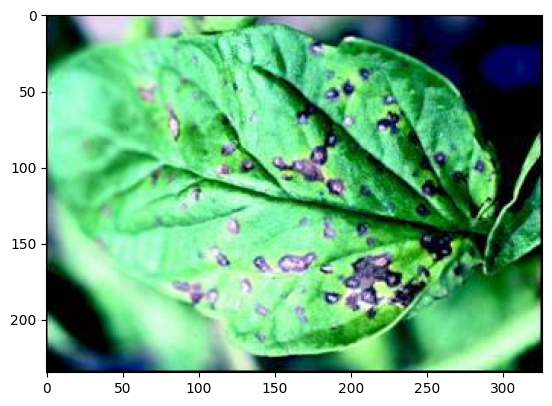

In [2]:
# Display an image to test correctness
path_to_588_images = "data_588_leafs/images/"
path_to_588_masks = "data_588_leafs/masks/"
image_0_path = path_to_588_images + "00000.jpg"
image_0 = Image.open(image_0_path)

plt.imshow(image_0)
plt.show()

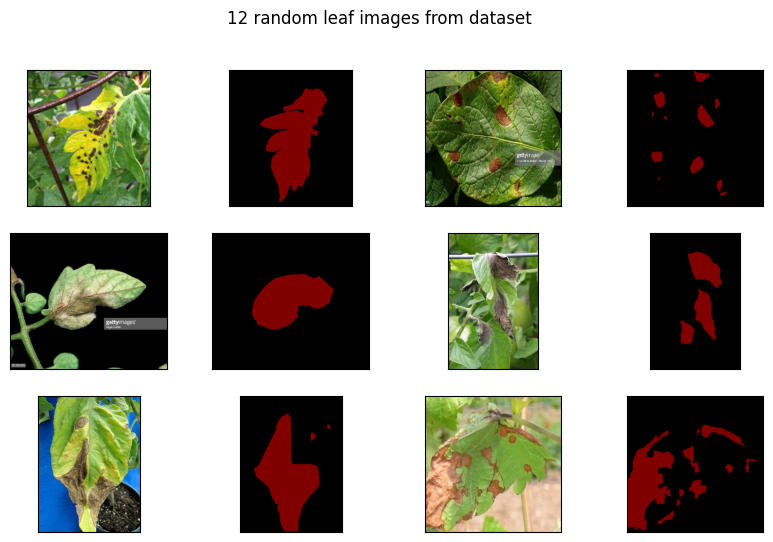

In [3]:
from os import path


nr_imgs = 588

random_selection = []

plt.figure(figsize=(10,6))

i = 0

while len(random_selection) < 6:
    rand_nr = np.random.randint(nr_imgs)
    if rand_nr in random_selection:
        continue
    
    i += 1
    random_selection.append(rand_nr)
    plt.subplot(3,4,i)
    img = Image.open(path_to_588_images + f"{rand_nr:05d}.jpg")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    i += 1
    plt.subplot(3,4,i)
    img = Image.open(path_to_588_masks + f"{rand_nr:05d}.png")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("12 random leaf images from dataset")
plt.show()

In [4]:
def plot_random_selection(im_number=588, nr_to_plot=6, 
                          ims_path="data/data/images/", 
                          masks_path="data/data/masks/", 
                          img_name="",
                          mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        random_selection.append(rand_nr)
        
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(ims_path + f"{img_name}{rand_nr:05d}.jpg")
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(masks_path + f"{mask_name}{rand_nr:05d}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


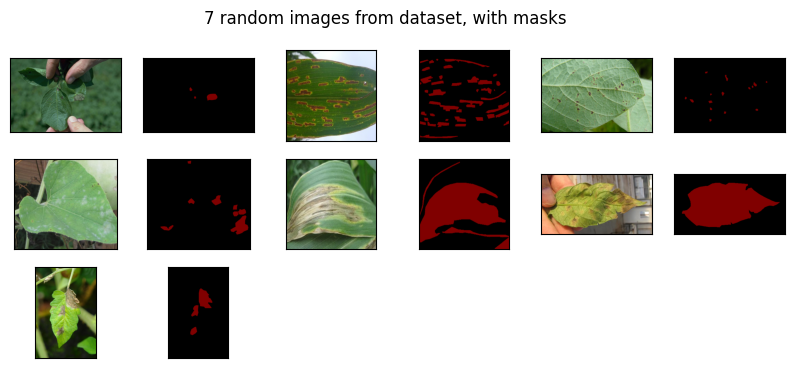

In [5]:
plot_random_selection(ims_path = path_to_588_images, masks_path=path_to_588_masks, im_number=588, nr_to_plot=7)

### Note: structure and restructuring of the data
The data we downloaded from Kaggle.com (https://www.kaggle.com/datasets/chzili/dataset-for-tobacco-leaf-disease-segmentation) contains 2 main directories: data1 and data2.

The data contains images for tobacco leaves disease segmentation.

##### data1 contents:
The folder data1 contains a folder of images and one of masks, each containing 3 types of images, separated by name but very similar in contents. All images (in the images subfolder) display square slices of pictures of tobacco leaves, with and without disease spots, which are mirrored by the mask folder, which highlight the disease spots on the leaves. The 3 types of images are augmented, IMG and A, we call them this because the naming system follows the type "augmented_{identifier}.png", "IMG_{identifier}.png", and "A_{identifier}.png". 

For the purposes of the project, we will move all images and masks of the augmented type into a separate folder, and rename IMG and A files for ease of use.

<h5>data2 contents: </h5>
The folder data2 contains aumented images and masks. We will be ignoring this folder, as it does not serve our purposes for the Computer VIsion project.



In [6]:
# trying to use it on new data
path_to_1291_images_scab = "data_1291_leafs/img_scab/"
path_to_1291_masks_scab = "data_1291_leafs/masks_machine_scab/"

img_name_system = "Train_" # Train_0.jpg, Train_1820.jpg
mask_name_system = "Train_" # Train_0.png, Train_1820.png
# Note: NOT ALL INDEXES HAVE ASSOCIATED IMAGES


In [7]:
def plot_random_scab(im_number=1820, nr_to_plot=6, 
                     ims_path=path_to_1291_images_scab, 
                     masks_path=path_to_1291_masks_scab, 
                     img_name="",
                     mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        try:
            img = Image.open(ims_path + f"{img_name}{rand_nr}.jpg")
        except: 
            continue

        random_selection.append(rand_nr)
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(masks_path + f"{mask_name}{rand_nr}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


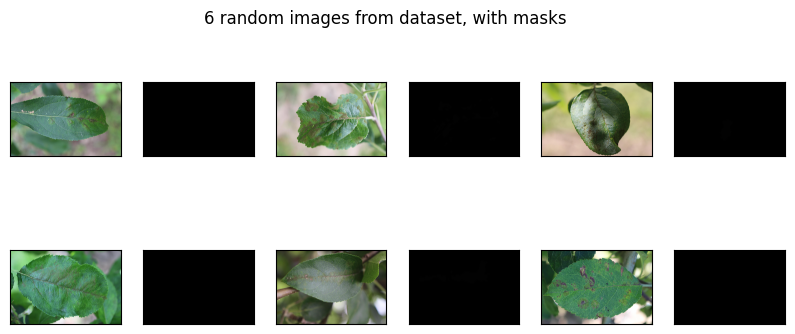

In [8]:
plot_random_scab(img_name=img_name_system, mask_name=mask_name_system)

The masks looks like totally black images, but the images are actually binary images, where the black pixels represent the healthy parts of the leaf, and the white pixels represent the diseased parts of the leaf, so we'll try to convert

(1365, 2048, 3)
(1365, 2048)
9111


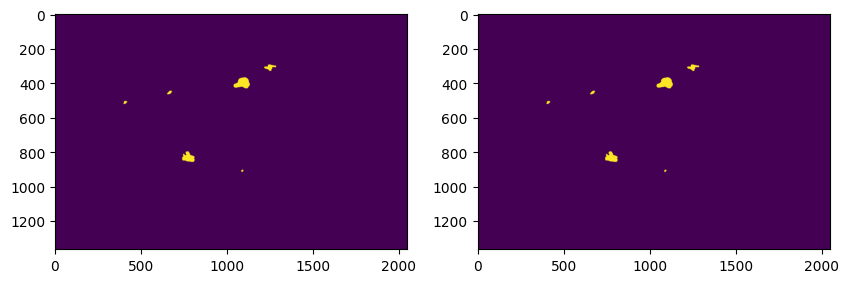

In [9]:
# trying different dataset
img = Image.open(path_to_1291_masks_scab + mask_name_system + "0.png")
# plt.imshow(img)

img_array = np.array(img)
# print(img_array)
print(img_array.shape)

gray_img = np.mean(img_array, axis=2) # converting to grayscale by averaging the 3 channels
print(gray_img.shape)

mask = gray_img > 0
print(len(img_array[mask]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray_img)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.show()

# There is not much difference between the average and the truth value

In [10]:
def transform_mask(mask):
    # mask = Image.open(path_to_mask) # this part is already done
    mask = np.array(mask)
    # mask = np.sum(mask, axis=2)
    mask[:,:,1:3] = 0 # make it red
    # mask = np.mean(mask, axis=2)
    mask = mask > 0
    # mask_array /= np.max(mask_array)
    return mask * 255

# plt.imshow(transform_mask(path_to_masks + mask_name_system + "0.png"))

In [11]:
def plot_random_scab(nr_to_plot=6, im_number=1820, 
                     ims_path=path_to_1291_images_scab, 
                     masks_path=path_to_1291_masks_scab, 
                     img_name=img_name_system,
                     mask_name=mask_name_system):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        try:
            img = Image.open(ims_path + f"{img_name}{rand_nr}.jpg")
        except: 
            continue

        random_selection.append(rand_nr)
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        mask = Image.open(masks_path + f"{mask_name}{rand_nr}.png")
        mask = transform_mask(mask)
        plt.imshow(mask, cmap="gray")        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


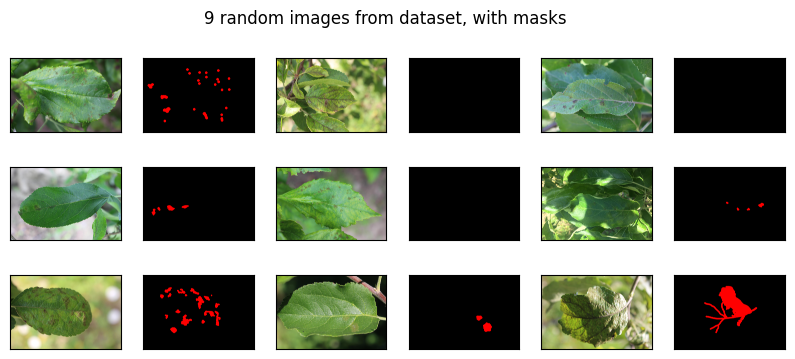

In [12]:
plot_random_scab(nr_to_plot=9)

In [13]:
def plot_leaf_and_mask_in_axs(img_name, path_to_leaf, path_to_mask, axs):
    try:
        img = Image.open(path_to_leaf)
    except:
        print(f"Error loading leaf image {img_name}")
        return
    leaf = Image.open(path_to_leaf)
    mask = Image.open(path_to_mask)
    red_mask = transform_mask(mask)
    leaf_array = np.array(leaf)
    red_mask_array = np.array(red_mask)
    overlay = np.clip(leaf_array + red_mask_array, 0, 255)

    # Plot the images (leaf, mask, leaf with mask)
    axs[0].imshow(leaf)
    axs[1].imshow(red_mask)
    axs[2].imshow(overlay)
    # Add the titles
    axs[0].set_title(f"Leaf {img_name}")
    axs[1].set_title("Spot mask")
    axs[2].set_title(f"Spots on leaf {img_name}")
    
    for ax in axs:
        ax.axis("off")


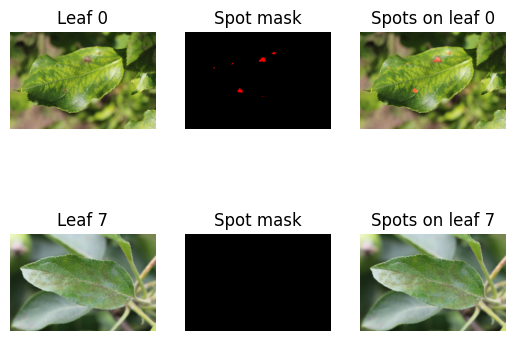

In [14]:


# plt.figure(figsize=(12,5))

f, (axs1, axs2) = plt.subplots(nrows=2,ncols=3)

# test
plot_leaf_and_mask_in_axs("0", path_to_1291_images_scab + img_name_system + "0.jpg", path_to_1291_masks_scab + mask_name_system + "0.png", axs1)
plot_leaf_and_mask_in_axs("7", path_to_1291_images_scab + img_name_system + "7.jpg", path_to_1291_masks_scab + mask_name_system + "7.png", axs2)


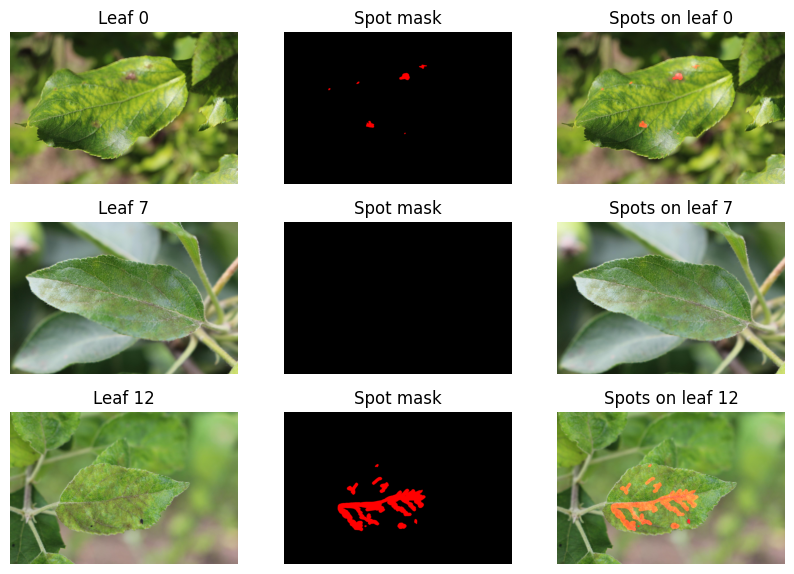

In [15]:
f, (axs1, axs2, axs3) = plt.subplots(nrows=3, ncols=3)
f.set_figwidth(10)
f.set_figheight(7)


# test
plot_leaf_and_mask_in_axs("0", path_to_1291_images_scab + img_name_system + "0.jpg", path_to_1291_masks_scab + mask_name_system + "0.png", axs1)
plot_leaf_and_mask_in_axs("7", path_to_1291_images_scab + img_name_system + "7.jpg", path_to_1291_masks_scab + mask_name_system + "7.png", axs2)
plot_leaf_and_mask_in_axs("12", path_to_1291_images_scab + img_name_system + "12.jpg", path_to_1291_masks_scab + mask_name_system + "12.png", axs3)


In [16]:
def check_image_of_1291_dataset(path_to_images, img_name_system):
    existing_images = []
    for i in range(3000):
        try:
            img = Image.open(path_to_images + img_name_system + f"{i}.jpg")
            existing_images.append(img)
        except:
            continue

    print(f"Found {len(existing_images)}")
    return existing_images

def check_masks_of_1291_dataset(path_to_masks, mask_name_system):
    existing_masks = []
    for i in range(3000):
        try:
            img = Image.open(path_to_masks + mask_name_system + f"{i}.png")
            existing_masks.append(img)
        except:
            continue

    print(f"Found {len(existing_masks)}")
    return existing_masks

def check_image_of_588_dataset(path_to_images):
    existing_images = []
    for i in range(588):
        try:
            img = Image.open(path_to_images + f"{i:05d}.jpg")
            existing_images.append(img)
        except:
            continue

    print(f"Found {len(existing_images)}")
    return existing_images

def check_masks_of_588_dataset(path_to_masks):
    existing_masks = []
    for i in range(588):
        try:
            img = Image.open(path_to_masks  + f"{i:05d}.png")
            existing_masks.append(img)
        except:
            continue

    print(f"Found {len(existing_masks)}")
    return existing_masks

path_to_images_scab = "data_1291_leafs/img_scab/"
path_to_masks_scab = "data_1291_leafs/masks_machine_scab/"
path_to_images_healthy = "data_1291_leafs/img_health/"
path_to_images_general_disease = "data_588_leafs/images/"
path_to_masks_general_disease = "data_588_leafs/masks/"

print("Images with scab from 1291 dataset:")
images_scab = check_image_of_1291_dataset(path_to_images_scab, img_name_system)
print("Masks with scab from 1291 dataset:")
masks_scab = check_masks_of_1291_dataset(path_to_masks_scab, mask_name_system)
print("Images healthy from 1291 dataset:")
images_healthy = check_image_of_1291_dataset(path_to_images_healthy, img_name_system)
print("Images general disease from 588 dataset:")
images_general_disease = check_image_of_588_dataset(path_to_images_general_disease)
print("Masks general disease from 588 dataset:")
masks_general_disease = check_masks_of_588_dataset(path_to_masks_general_disease)

print("Total images = ", len(images_scab) + len(images_healthy) + len(images_general_disease))
print("Total masks = ", len(masks_scab) + len(masks_general_disease))
print("Number is unequal because healthy images do not have masks.")

Images with scab from 1291 dataset:
Found 592
Masks with scab from 1291 dataset:
Found 592
Images healthy from 1291 dataset:
Found 515
Images general disease from 588 dataset:
Found 588
Masks general disease from 588 dataset:
Found 588
Total images =  1695
Total masks =  1180
Number is unequal because healthy images do not have masks.


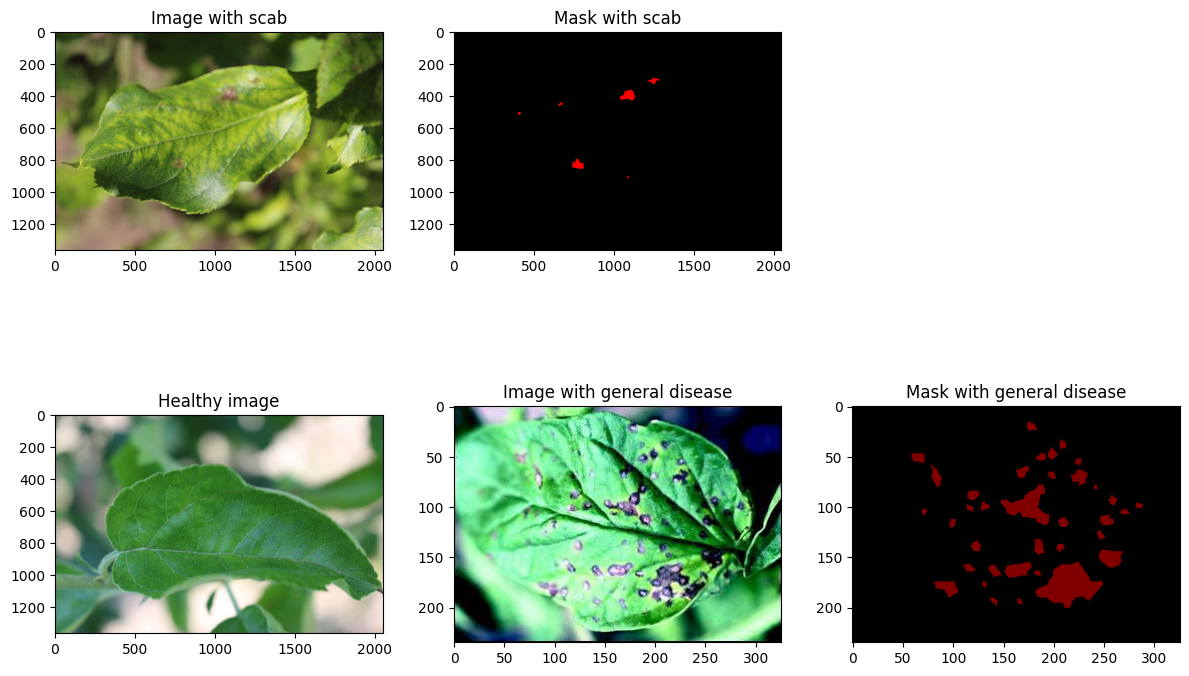

In [18]:
img_scab = images_scab[0]
mask_scab = masks_scab[0]
img_healthy = images_healthy[0]
img_general_disease = images_general_disease[0]
mask_general_disease = masks_general_disease[0]
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(img_scab)
plt.title("Image with scab")
plt.subplot(2,3,2)
plt.imshow(transform_mask(mask_scab), cmap="gray")
plt.title("Mask with scab")
plt.subplot(2,3,4)
plt.imshow(img_healthy)
plt.title("Healthy image")
plt.subplot(2,3,5)
plt.imshow(img_general_disease)
plt.title("Image with general disease")
plt.subplot(2,3,6)
plt.imshow(mask_general_disease)
plt.title("Mask with general disease")
plt.tight_layout()
plt.show()

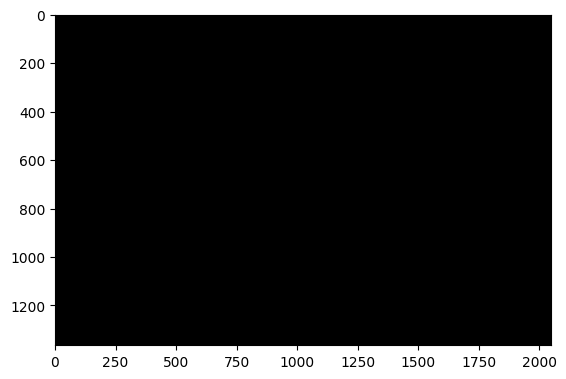

In [ ]:
# Dataset concatenation
masks_healthy = []
for _ in images_healthy:
    masks_healthy.append(Image.new("L", (img_healthy.size), 0)) # create blank mask for healthy images
    

In [ ]:
all_images = images_scab + images_healthy + images_general_disease
all_masks = masks_scab + masks_general_disease + masks_healthy


<class 'list'>
